## Principais arquiteturas de redes convolucionais

## ImageNet

[ImageNet](https://image-net.org/) é um dataset com 1000 classes distintas de imagens, 1.2 milhões de imagens de treino, 50k imagens de validação e 150k imagens de teste que é utilizado pelo desafio 
[ImageNet Large Scale Visual Recognition Challenge](http://www.image-net.org/challenges/LSVRC/), ou ILSVRC, para selecionar os melhores modelos de classificação de imagens a cada ano.

O dataset original tem 15 milhões de imagens em alta resolução e label para 22 mil classes, mas para a competição elas foram cortadas no centro para conter apenas 256x256 pixels.

Os modelos treinados utilizando esses dados têm melhorado muito sua acurácia desde que esse dataset foi lançado.

<img src=https://theaisummer.com/static/4690fef2d8149b10c72af46aca0710be/c1b63/image-classification-plot-imagenet.png width=700 text="https://theaisummer.com/cnn-architectures/">



<img src=https://theaisummer.com/static/dfad9981c055b1ba1a37fb3d34ccc4d8/a1792/deep-learning-architectures-plot-2018.png width=700 text="https://theaisummer.com/cnn-architectures/">

### AlexNet (2012)

Trouxe várias melhorias em relação às CNNs anteriores:
- ReLu (antes usavam sigmoid e tanh)
- Uso de multiplos GPUs
- Data Augmentation
- Dropout
- Stride e maxpooling para redução de custo computacional
- 8 camadas

<img src=https://d3i71xaburhd42.cloudfront.net/b57e6468740d9320f3f14c6079168b8e21366416/11-Figure14-1.png width=400 text="https://www.semanticscholar.org/paper/The-History-Began-from-AlexNet%3A-A-Comprehensive-on-Alom-Taha/b57e6468740d9320f3f14c6079168b8e21366416">

[Fonte](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)

LRNs (Local Response Normalization) layers are used in Alexnet to normalize pixels across channels in the first convolutional layers. This is in order to to ensure that very bright or dark pixels do not dominate their neighbours.

## VGGNet (2014)

As VGG16, VGG19, etc só diferem na quantidade de camadas.

Melhorias:
- troca os filtros 11x11, 5x5, 3x3 do AlexNet por multiplos filtros de 3x3 reduzindo o número de parâmetos a serem treinados e obtendo o mesmo tamanho final. 
- 16 (VGG16) ou 19 (VGG19) camadas

O efeito de uma camada conv 7x7 (11x11) pode ser alcançado implementando três (cinco) camadas conv 3x3 com um passo de um. Isso reduz o número de variáveis ​​treináveis ​​em 44,9% (62,8%).
[Fonte](https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96)


<img src=https://d3i71xaburhd42.cloudfront.net/b57e6468740d9320f3f14c6079168b8e21366416/12-Figure15-1.png width=500 text="https://www.semanticscholar.org/paper/The-History-Began-from-AlexNet%3A-A-Comprehensive-on-Alom-Taha/b57e6468740d9320f3f14c6079168b8e21366416">

<br>
<br>

<img src=https://miro.medium.com/max/875/1*HzxRI1qHXjiVXla-_NiMBA.png text='https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96' width=600>

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## ResNet(2015)

A Rede Neural Residual (ResNet) tem uma arquitetura nova com “saltos de conexões” e apresenta normalização de batch pesado. Esses saltos também são conhecidas como gate units e são muito parecidas com as RNNs.

- Adição de blocos residuais

<img src=https://miro.medium.com/max/875/1*6hF97Upuqg_LdsqWY6n_wg.png width=900>

Esse modelo espera que as imagens de input tenham shape 224×224.

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
# load model
model = ResNet50()
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## Inception - GoogLeNet

Devido a enorme variação na localização das informações na imagem, a escolha do tamanho correto do kernel para a operação de convolução torna-se difícil. Um kernel maior é preferível para informações distribuídas mais globalmente, e um kernel menor é preferível para informações distribuídas mais localmente. Para resolver esse problema as redes do tipo GoogleNet criaram unidades modulares que utilizam diferentes tamanhos de kernel na convolução.

<img src=https://miro.medium.com/max/875/1*U_McJnp7Fnif-lw9iIC5Bw.png text="https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202" width=500>

<img src=https://miro.medium.com/max/875/1*uW81y16b-ptBDV8SIT1beQ.png text="https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202" width=900>

Nem precisamos dizer que é um classificador bastante profundo. Como acontece com qualquer rede muito profunda, ela está sujeita ao problema do gradiente de fuga.

Para evitar que a parte do meio da rede “desapareça”, os autores introduziram dois classificadores auxiliares (as caixas roxas na imagem).

Após aplicar os filtros de convolução paralelamente, eles são concatenados e enviados para a próxima camada:

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdvyzrN%2FbtqNkQRUokj%2FDrrKv0t5QJ9CyRI45aosd1%2Fimg.jpg" text="https://techblog-history-younghunjo1.tistory.com/132" width=600>


Nesse modelo a entrada das imagens coloridas é no formato 299×299.

So in the Inception architecture, we use the 1x1 convolutional filters to reduce dimensionality in the filter dimension. As I explained above, these 1x1 conv layers can be used in general to change the filter space dimensionality (either increase or decrease) and in the Inception architecture we see how effective these 1x1 filters can be for dimensionality reduction, explicitly in the filter dimension space, not the spatial dimension space.

In [ ]:
# import tensorflow
# from keras.applications.inception_v3 import InceptionV3
# # load model
# model = InceptionV3()
# # summarize the model
# model.summary()

## Transfer Learning

Esses modelos que já foram treinados podem nos ajudar de diversas formas:

- podemos fazer o download da rede com os pesos treinados e aplicar diretamente em um problema de classificação;

- as camadas mais profundas dessas redes já aprenderam muito sobre extração de features e podemos usá-las para extrair features das nossas imagens;

- podemos utilizar a estrutura de camadas construída e treinar um modelo novo a partir dela;

- transfer learning: utilizar parte do modelo treinado para extração de features e adicionar no topo dele novas partes para serem treinadas e adaptadas para o novo problema.

<center>
<img src=https://pennylane.ai/qml/_images/transfer_learning_general.png width=400 text="https://pennylane.ai/qml/demos/tutorial_quantum_transfer_learning.html">
</center>



Passo-a-passo:

1 - Pegue uma rede $A$ que foi pré-treinada em um conjunto de dados $D_A$ e para uma determinada tarefa $T_A$.

2 - Remova algumas das camadas finais. Desta forma, a rede truncada $A^′$ resultante pode ser usada como um extrator de features.

3 - Conecte uma nova rede treinável $B$ no final da rede pré-treinada $A^′$.

4 - Mantenha os pesos de $A^′$ fixos e treine apenas o bloco final $B$ com um novo conjunto de dados $D_B$ e/ou para uma nova tarefa de interesse $T_B$.


Uma última etapa, opcional, é o ajuste fino, que consiste em descongelar todo o modelo obtido acima e retreiná-lo nos novos dados com uma taxa de aprendizado muito baixa. Dessa forma, manteríamos a mesma estrutura do modelo copiado, mas todos os pesos seriam retreinados. Isso pode potencialmente alcançar melhorias significativas, adaptando incrementalmente os recursos pré-treinados aos novos dados.

### Porque utilizar transfer learning?

- modelos de treinamento com alta precisão requerem muitos dados. Por exemplo, o conjunto de dados ImageNet contém mais de 1 milhão de imagens. No mundo real, é improvável que você tenha um conjunto de dados tão grande.
- supondo que você tenha esse tipo de conjunto de dados, talvez ainda não tenha os recursos necessários para treinar um modelo em um conjunto de dados tão grande. Portanto, o aprendizado de transferência faz muito sentido se você não tiver os recursos de computação necessários para treinar modelos em grandes conjuntos de dados.
- mesmo se você tivesse os recursos de computação à sua disposição, ainda teria que esperar dias ou semanas para treinar esse modelo. Portanto, usar um modelo pré-treinado economizará um tempo precioso.

[Fonte](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras)

### Onde consegui modelos pré-treinados?

[TensorFlow Hub](https://www.tensorflow.org/hub?hl=pt-br)

[Keras Applications](https://keras.io/api/applications/)

[Hugging Face](https://huggingface.co/models)

[Model Zoo](https://modelzoo.co/)

Lembre-se de checar a licensa do modelo antes de utilizá-lo.

### Onde conseguir dados para treinar meu modelo?

[TensorFlow Dataset](https://knowyourdata-tfds.withgoogle.com/)

[Kaggle](www.kaggle.com)


### Bora ver código?



In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### Predição usando um modelo pré-treinado

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

[tf.keras.applications.vgg16.preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input):

The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling. 

In [24]:
# load da imagem
image = load_img('dog.jpg', target_size=(224, 224))
print(type(image))

<class 'PIL.Image.Image'>


In [25]:
image = img_to_array(image)
print(type(image))

<class 'numpy.ndarray'>


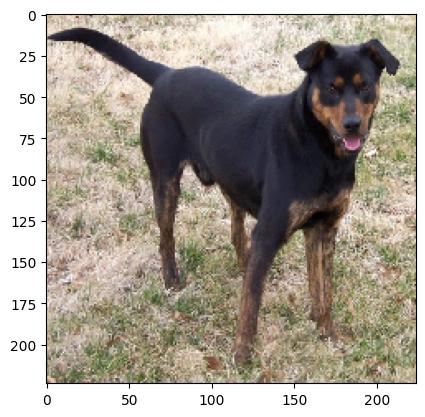

In [26]:
plt.imshow(image.astype(int))
plt.show()

In [27]:
image.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


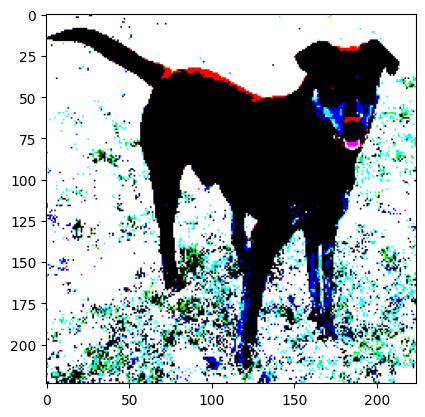

In [28]:
image_ = preprocess_input(image)
plt.imshow(image_)
plt.show()

In [29]:
# shape=(None, 224, 224, 3)
image_ = image_.reshape((1, image_.shape[0], image_.shape[1], image_.shape[2]))
print(image_.shape)

(1, 224, 224, 3)


In [30]:
y_pred = model.predict(image_)

1/1 [==============================] - 0s 352ms/step


In [32]:
y_pred.shape

(1, 1000)

In [33]:
label= decode_predictions(y_pred)
label 

[[('n02107142', 'Doberman', 0.36759833),
  ('n02105412', 'kelpie', 0.18594064),
  ('n02106550', 'Rottweiler', 0.16523257),
  ('n02089078', 'black-and-tan_coonhound', 0.13520493),
  ('n02107312', 'miniature_pinscher', 0.038006026)]]

In [34]:
label= decode_predictions(y_pred, top=1)
label 

[[('n02107142', 'Doberman', 0.36759833)]]

### Usando um modelo para extrair features de uma imagem

We will load the model with the classifier output part of the model, but manually remove the final output layer. This means that the second last fully connected layer with 4,096 nodes will be the new output layer.

In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from tensorflow.keras.models import Model
from pickle import dump

image = load_img('dog.jpg', target_size=(224, 224))
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

In [37]:
model_ = VGG16()

In [38]:
model_.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
model_.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>]

In [50]:
model_.layers[-4].output

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten')>

In [51]:
model_ = Model(inputs=model_.inputs, outputs=model_.layers[-4].output)

In [52]:
features = model_.predict(image)

1/1 [==============================] - 0s 219ms/step


In [53]:
features.shape

(1, 25088)

In [54]:
dump(features, open('features_dog.pkl', 'wb'))

Vamos pegar nossas features de camadas anteriores e plotar a saída

In [55]:
model_ = VGG16()
# remove the output layer
model_ = Model(inputs=model_.inputs, outputs=model_.layers[-14].output)
# get extracted features
features = model_.predict(image)
print(features.shape)

1/1 [==============================] - 0s 119ms/step
(1, 56, 56, 256)


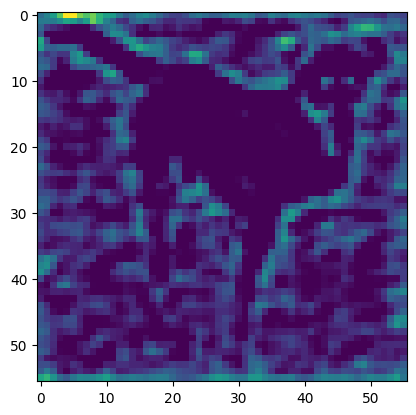

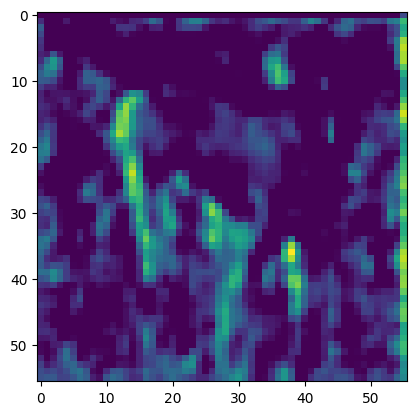

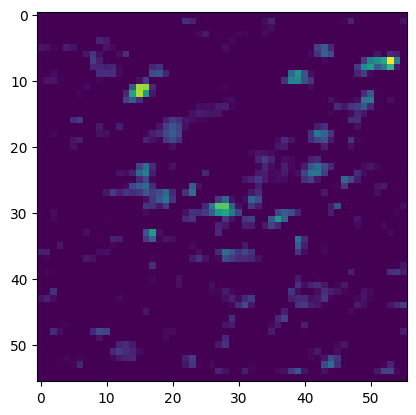

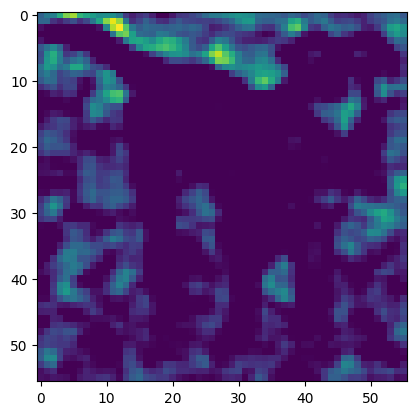

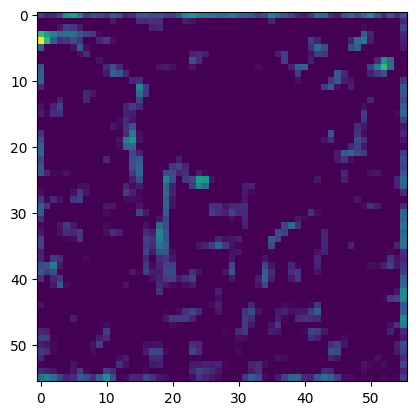

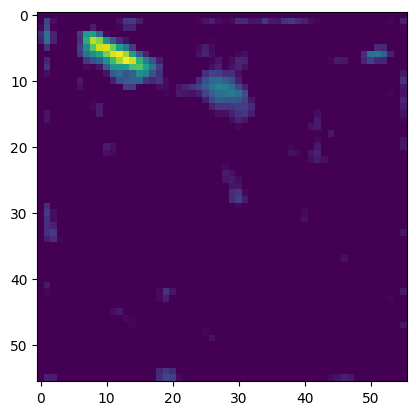

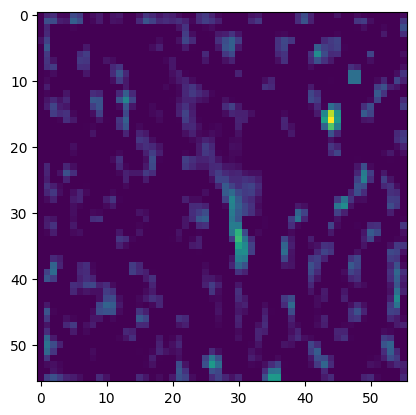

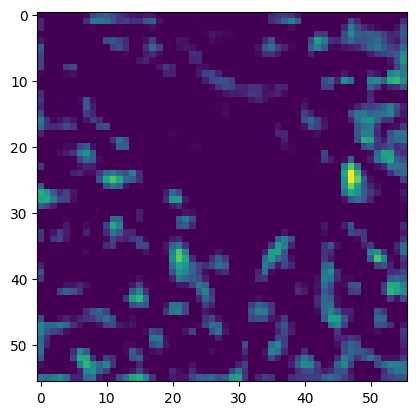

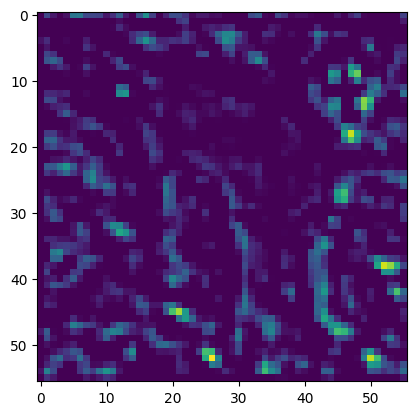

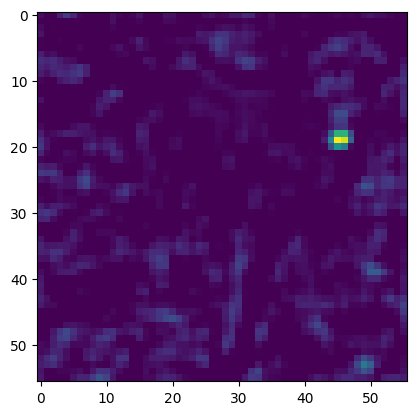

In [56]:
# 10 primeiros filtros
for i in range(0,10):
    plt.imshow(features[0,:,:,i].astype(int))
    plt.show()

In [3]:
#import tensorflow
#from keras.applications.inception_v3 import InceptionV3
#     # load model
#model = InceptionV3() 
#  #  summarize the model
#model.summary()

96112376/96112376 [==============================] - 9s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

 conv2d_11 (Conv2D)             (None, 35, 35, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_22 (Conv2D)             (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23

                                                                                                  
 activation_29 (Activation)     (None, 17, 17, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
          

                                                                  'activation_33[0][0]',          
                                                                  'activation_38[0][0]',          
                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
          

                                                                                                  
 batch_normalization_54 (BatchN  (None, 17, 17, 160)  480        ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_65 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_64[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66

                                                                                                  
 activation_73 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_73[0][0]'] 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_84 (Conv2D)             (None, 8, 8, 192)    245760      ['average_pooling2d_7[0][0]']    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
          

                                                                                                  
 activation_88 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_88[0][0]'] 
                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

#### Transfer learning

Baixar o dataset de treino de dogs-vs-cats do [kaggle](https://www.kaggle.com/competitions/dogs-vs-cats/data). Se vocês observarem as imagens de cães e gatos estão todas em uma mesma pasta. Para utilizarmos a função [`image_dataset_from_directory`](https://keras.io/api/preprocessing/image/) do keras, precisamos que a estrutura dos dados seja com uma pasta para cada classe como no exemplo abaixo:

<img src=https://lh6.googleusercontent.com/HtOCgap59oE8SUGoipMH-6xeRrYFbw4XlNW6RLVCZxvYBaHmtPUJyqrYjUrDcSGt5pX1DLaX5f4IqbvABGvQqvo3BihGJTpmXcWQ9MjNJxGLhoiFcnba--gkZQBbykAJjr_yizaP width=150>


Iniciando a construção do modelo:

Instancia um modelo base com todos os pesos e remove o classificador do modelo utilizando o parâmetro `include_top=False`.


A última camada de features tem shape (4,4,512) sobre o qual adicionameros um classificador densamente conectado.

O VGG16 foi adicionado no modelo como se fosse uma camada.

Congela os pesos do modelo base para não serem treinados:

##### Data Augmentation

Aguardando o modelo rodar:

<img src=https://geonetcast.files.wordpress.com/2019/08/waiting.jpg>

Podemos salvar os parâmetros e a estrutura do modelo com o método `save`:

Exemplo de como as imagens ficam após o Data Augmentation:

In [ ]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

____
____

# Bibliografia e Aprofundamento

- https://keras.io/guides/transfer_learning/

- https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

- https://medium.com/@manasnarkar/transfer-learning-getting-started-9cebf5855a08

- [Acoplando vários modelos pré-treinados para criar um único modelo](https://stackoverflow.com/questions/70767771/how-to-stack-transfer-learning-models-in-a-sequential)

- Transfer Learning falha quando os datasets não são similares. Artigo que estuda sobre essa [similaridade de datasets](https://arxiv.org/pdf/1411.1792.pdf)

- [Example of transfer learning with natural language processing](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras)

- https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

_____
_____

## Exercício

Vamos utlizar o dataset do tensorflow que reconhece doença nas folhas de plantas cítricas.

In [ ]:
! pip install tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds
ds, meta = tfds.load('citrus_leaves', with_info=True, split='train', shuffle_files=True)

# https://machinelearningmastery.com/image-augmentation-with-keras-preprocessing-layers-and-tf-image/

Os dados são baixados na pasta ~/tensorflow_datasets e estão no formato

.../Citrus/Leaves <br>
├── Black spot <br>
├── Melanose <br>
├── canker <br>
├── greening <br>
└── healthy <br>

Onde cada diretório é uma classe.

1 - Utilize Data Augmentation e um modelo pré-treinado para fazer transfer learning e criar um modelo que detecte as doenças das folhas de citrus.

2 - Para fazer um train_test_split no conjunto de treino utilize como base esse [stackoverflow](https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator)

Salve o modelo utilizando o método `model.save` do keras

Plote os gráficos de loss e acurácia

_____
_____